# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.


Представим, что это метафорический студент, выполняющий домашку. Он пока не подозревает, что его ждет, хотя глаза уже выдают осознаваемую истину...

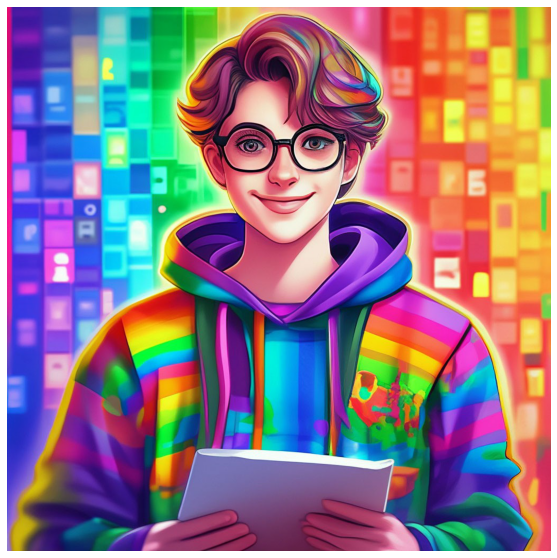

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('картинка_1.jpeg')

plt.figure(figsize=(10, 10))  

plt.imshow(img)
plt.axis('off') 
plt.show()


Изначально я думал, что это будет забавно и весело. Хотел оформить все графики в радужной рацветке и вообще подарить всем хорошее настроение. Но к концу единственное, что я хотел, это чтобы это все закончилось.

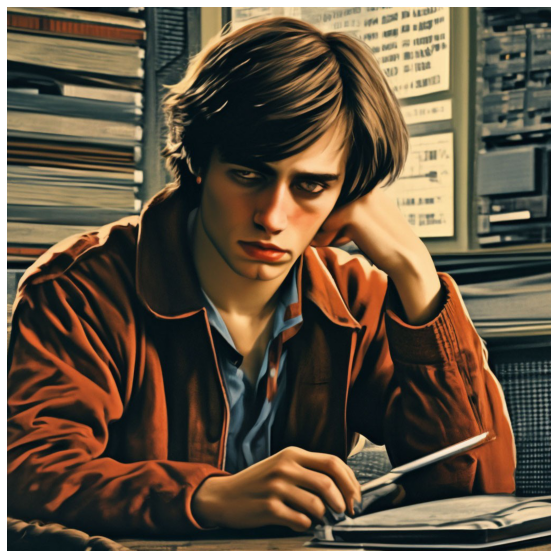

In [19]:
img = mpimg.imread('картинка_2.jpeg')

plt.figure(figsize=(10, 10))  

plt.imshow(img)
plt.axis('off') 
plt.show()

Помните чувака с первой картинки? Это он после выполнения ДЗ_2 по МО.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [20]:
!pip install folium

In [169]:
!pip install haversine

In [347]:
!pip install folium shapely

In [21]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df = pd.read_csv('train_taxi.csv', sep = ',')
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop('dropoff_datetime', axis=1, inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

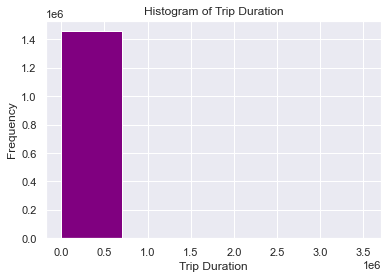

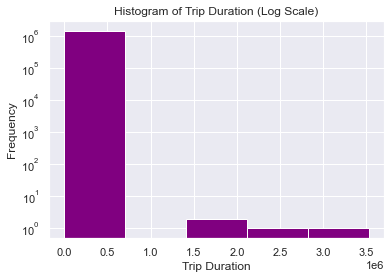

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df['trip_duration'], bins=5, color='purple')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration')
plt.show()


plt.hist(df['trip_duration'], bins=5, color='purple', log=True)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration (Log Scale)')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Есть выбросы, основные значения принимают невысокие значения длины поездки

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** RMLSE используется, когда в значениях есть большой разброс, чтобы большие ошибки не доминировали над небольшими. В нашем датасете как раз большйо разброс (его даже пришлось изображать на логарифмической шкале)

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


1. Мы хотим минимизировать RMSLE между логарифмами предсказанных значений и логарифмами истинных значений. RMSLE вычисляется по формуле:

   $$\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{a}(x_i) + 1))^2}$$

2. Подставим значение $a(x) = \exp(\hat{a}(x)) - 1$ в формулу для RMSLE:

   $$\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\log(y_i + 1) - \log(\exp(\hat{a}(x_i)) + 1)\right)^2}$$

3. Рассмотрим свойство логарифма: $\log(\exp(x)) = x$.
   Применим это свойство к формуле:

   $$\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \hat{a}(x_i))^2}$$
   
4. Оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}(x)$:

   $$\text{MSE}_{\hat{a}} = \frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \hat{a}(x_i))^2$$


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

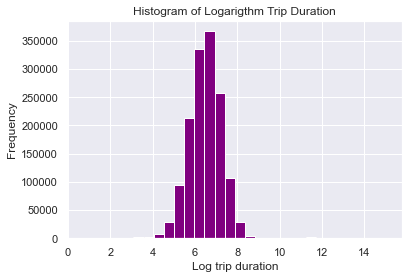

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642


In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df['trip_duration'])

plt.hist(df['log_trip_duration'], bins=30, color='purple')
plt.xlabel('Log trip duration')
plt.ylabel('Frequency')
plt.title('Histogram of Logarigthm Trip Duration')
plt.show()

df.head(5)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [27]:
def rmsle(log1p_y_true, log1p_y_pred): 
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

rmsle_best_const = rmsle(df.log_trip_duration, np.repeat(np.mean(df.log_trip_duration), df.shape[0])) 
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365412156


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

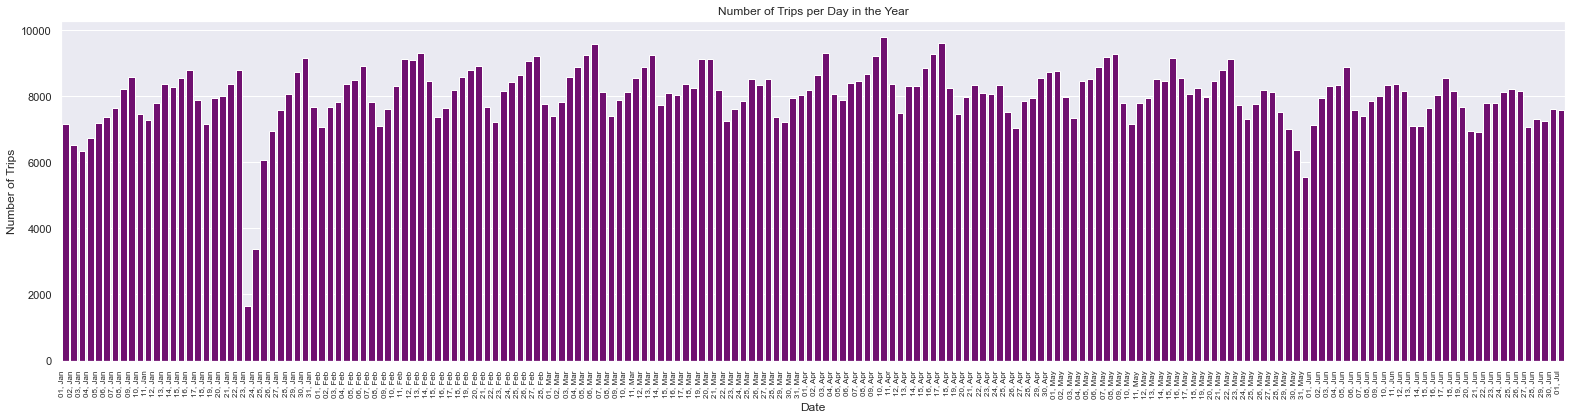

In [28]:
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

daily_trip_counts = df.groupby('day_of_year').size()

plt.figure(figsize=(22, 6))
ax = sns.countplot(x='day_of_year', data=df, color='purple')

day_labels = [pd.to_datetime('2023-01-01') + pd.DateOffset(i-1) for i in daily_trip_counts.index]

ax.set_xticks(range(len(day_labels)))
ax.set_xticklabels([day.strftime('%d, %b') for day in day_labels], rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day in the Year')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Ответ:** 

23 января была снежная буря: https://www.rbc.ru/society/23/01/2016/56a3e5799a79474d3a9a9598

30-31 мая: Много времени я потратил на поиски, но никакого иного варианта, кроме всемирной выставки филателистов не нашел: https://en.wikipedia.org/wiki/World_Stamp_Show-NY_2016

P.S. Там был выходной и все просто уехали из города)


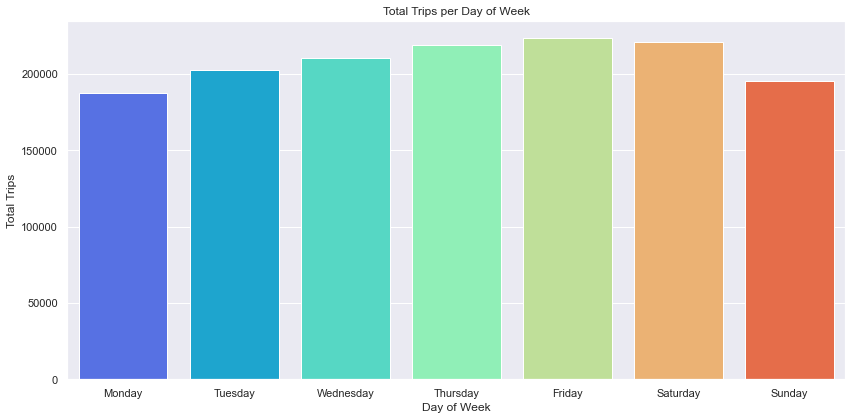

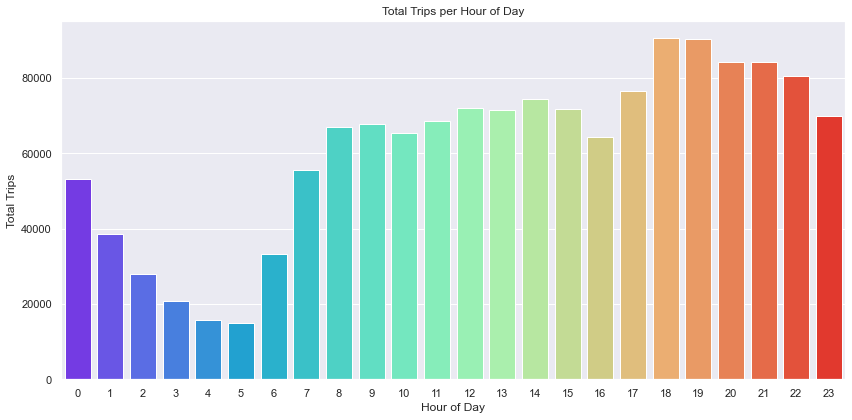

In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['pickup_datetime'].dt.hour

day_of_week_counts = df.groupby('day_of_week').size()
hour_of_day_counts = df.groupby('hour_of_day').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values,  palette='rainbow')
plt.xlabel('Day of Week')
plt.ylabel('Total Trips')
plt.title('Total Trips per Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()

plt.figure(figsize=(12, 6))
sns.barplot(x=hour_of_day_counts.index, y=hour_of_day_counts.values, palette='rainbow')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.title('Total Trips per Hour of Day')
plt.tight_layout()

plt.show()



**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

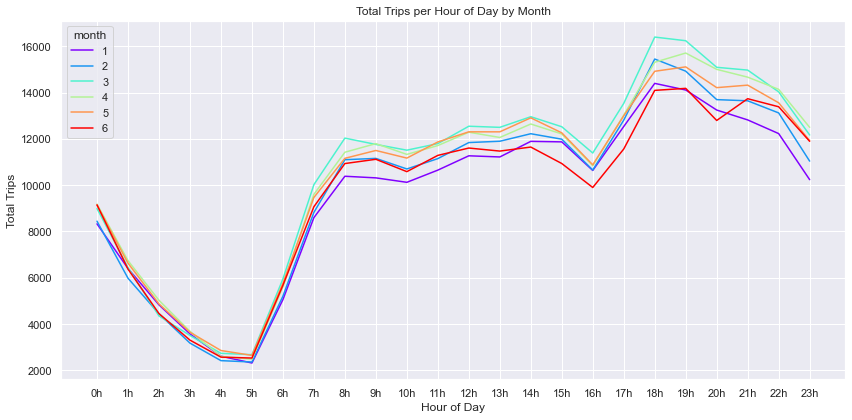

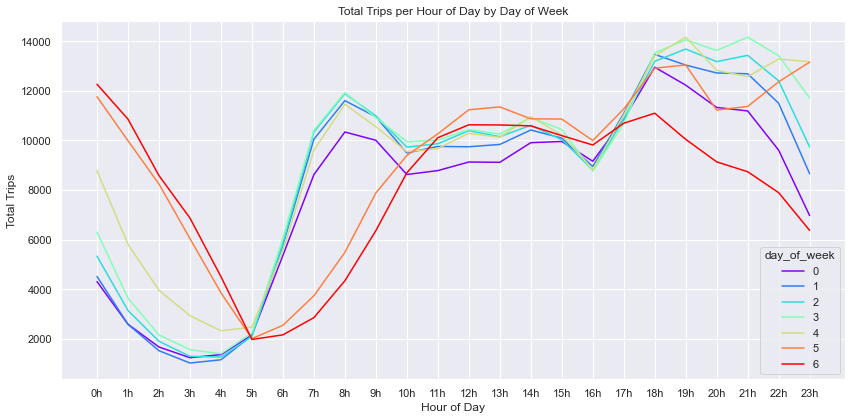

In [30]:
df['month'] = df['pickup_datetime'].dt.month

monthly_counts = df.groupby(['month', 'hour_of_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='hour_of_day', y='count', hue='month', data=monthly_counts, palette='rainbow')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.title('Total Trips per Hour of Day by Month')
plt.xticks(range(0, 24), [str(i) + 'h' for i in range(24)])  # Подписываем каждый час
plt.grid(True)
plt.tight_layout()
plt.show()

df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

day_of_week_counts = df.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='hour_of_day', y='count', hue='day_of_week', data=day_of_week_counts, palette='rainbow')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.title('Total Trips per Hour of Day by Day of Week')
plt.xticks(range(0, 24), [str(i) + 'h' for i in range(24)])  # Подписываем каждый час
plt.grid(True)
plt.tight_layout()
plt.show()

**Ответ:**

По месяцам распределение примерно одинаковое. В марте и апреле такси пользуются чуть чаще.

По дням недели: в выходные активно пользуются такси ночью и менее активо с утра. Инетресно, что в 5 утра в любой день недели пользуются такси примерно в одиновом объеме. В пятницу и субботу акивнее пользуются такси по вечерам (что после 00.00 превращается в уже отмеченное выше использование такси в субботу и воскресенье по ночам).

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

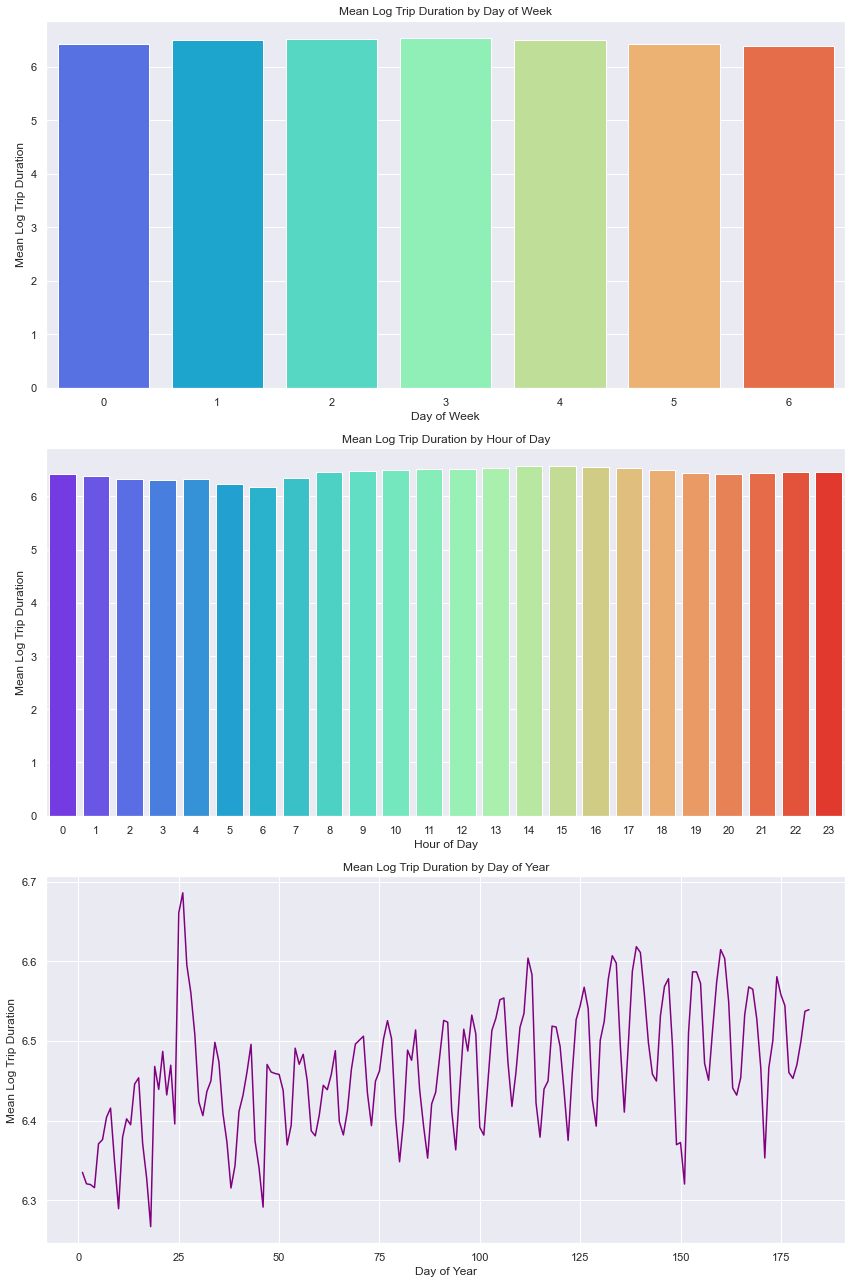

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3)

mean_log_duration_day_of_week = train_df.groupby('day_of_week')['log_trip_duration'].mean()
mean_log_duration_hour_of_day = train_df.groupby('hour_of_day')['log_trip_duration'].mean()
mean_log_duration_day_of_year = train_df.groupby('day_of_year')['log_trip_duration'].mean()

fig, ax = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=mean_log_duration_day_of_week.index, y=mean_log_duration_day_of_week.values, ax=ax[0], palette='rainbow')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Mean Log Trip Duration')
ax[0].set_title('Mean Log Trip Duration by Day of Week')

sns.barplot(x=mean_log_duration_hour_of_day.index, y=mean_log_duration_hour_of_day.values, ax=ax[1], palette='rainbow')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Mean Log Trip Duration')
ax[1].set_title('Mean Log Trip Duration by Hour of Day')

sns.lineplot(x=mean_log_duration_day_of_year.index, y=mean_log_duration_day_of_year.values, ax=ax[2], color = 'purple')
ax[2].set_xlabel('Day of Year')
ax[2].set_ylabel('Mean Log Trip Duration')
ax[2].set_title('Mean Log Trip Duration by Day of Year')

plt.tight_layout()
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: 

Графики похожи тем, что практические не колеблются

Есть восходящий тренд от номера дня, но воластильность его съедает

В Аномальные периоды есть отклонения: в первый сильно вверх, во второй - несильно вниз

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def is_anomaly_day(date):
    january_anomaly = 23 <= date.day <= 27 and date.month == 1
    may_june_anomaly = (29 <= date.day <= 31 and date.month == 5) or (date.day == 1 and date.month == 6)
    return 1 if january_anomaly or may_june_anomaly else 0

df['anomal_day'] = df['pickup_datetime'].apply(is_anomaly_day)

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,anomal_day
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,0,17,3,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,6,0,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,1,11,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,2,19,4,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,5,13,3,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: 
    
    категориальные - дни недели и месяцы, потому что их мало или они цикличны, и моедль не поймет, что понедельник идет за воскрсеньем
    
    численные - номер дня и номер часа. Номер дня рассматривать как категориальный бессмысленно, так как важна динамика. Номер часа - можно, но кажется, динамика важнее цикличности

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [33]:
df_ridge = df.loc[:, ['log_trip_duration','day_of_year', 'day_of_week', 'hour_of_day', 'month', 'anomal_day']]

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#ДРОПНУТ ПОНЕДЕЛЬНИК И ЯНВАРЬ, ПОТОМУ ЧТО ВЕКТОРЫ МУЛЬТИКОЛЛИНЕАРНЫЕ

columns_to_encode = ['day_of_week', 'month']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(df_ridge[columns_to_encode]), 
                                columns=encoder.get_feature_names(columns_to_encode))

df_ridge = df_ridge.drop(columns=columns_to_encode)
df_ridge_encoded = pd.concat([df_ridge, encoded_features], axis=1)
columns_to_scale = ['day_of_year', 'hour_of_day']

scaler = StandardScaler()

df_ridge_encoded[columns_to_scale] = scaler.fit_transform(df_ridge_encoded[columns_to_scale])


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target = df_ridge_encoded['log_trip_duration']
features = df_ridge_encoded.drop('log_trip_duration', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=24)
ridge_model = Ridge()

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

rmsle = np.sqrt(mean_squared_error(np.log1p(y_test_actual), np.log1p(y_pred_actual)))

print('Root Mean Squared Logarithmic Error (RMSLE):', rmsle)

Root Mean Squared Logarithmic Error (RMSLE): 0.7918131544143133


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [36]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [37]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [38]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**

Скопление точек в аэропорту Джона Кеннеди.
Еще одна точка в ажропорту на Юго-Западе от Нью-Йорка.
Одна точка в Alpine на севере.

Но в качестве признаков я выберу три аэропорта (логично, они популярны и не в городе): Джон Кеннеди, Ньюарк и ЛаГуардия

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics.pairwise import haversine_distances
from math import radians

def haversine_function(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    pickup = [pickup_latitude, pickup_longitude]
    dropoff = [dropoff_latitude, dropoff_longitude]
    pickup_in_radians = [radians(_) for _ in pickup]
    dropoff_in_radians = [radians(_) for _ in dropoff]
    result = haversine_distances([pickup_in_radians, dropoff_in_radians])
    return result[0][1] * 6371000/1000 

df['haversine'] = df.apply(lambda row: haversine_function(row['pickup_latitude'], row['pickup_longitude'], 
                                                          row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,anomal_day,haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,0,17,3,0,1.498521
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,6,0,6,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,1,11,1,0,6.385098
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,2,19,4,0,1.485498
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,5,13,3,0,1.188588


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_haversine'] = np.log1p(df['haversine'])
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,anomal_day,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,0,17,3,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,6,0,6,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,1,11,1,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,2,19,4,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,5,13,3,0,1.188588,0.783257


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [41]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

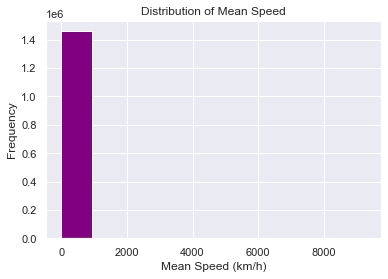

In [42]:
df['mean_speed'] = df['haversine'] / ((df['trip_duration'])/3600)

mean_speed = df['mean_speed']

plt.hist(mean_speed, color='purple')

plt.xlabel('Mean Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Speed')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

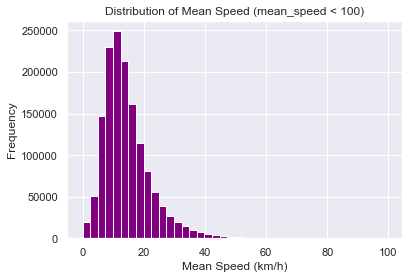

In [43]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
filtered_mean_speed = df[df['mean_speed'] < 100]['mean_speed']

plt.hist(filtered_mean_speed, bins=40, color='purple')

plt.xlabel('Mean Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Speed (mean_speed < 100)')
plt.show()

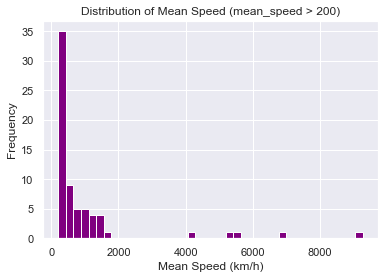

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
filtered_mean_speed = df[df['mean_speed'] > 200]['mean_speed']

plt.hist(filtered_mean_speed, bins=40, color='purple')

plt.xlabel('Mean Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Speed (mean_speed > 200)')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

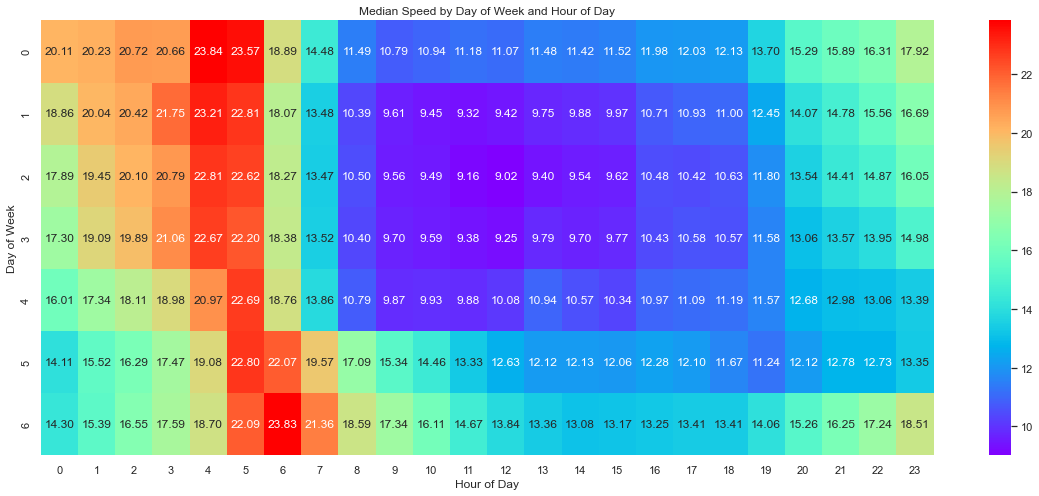

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

median_speed_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['mean_speed'].median().unstack()

plt.figure(figsize=(20, 8))
ax = sns.heatmap(median_speed_by_day_hour, cmap='rainbow', annot=True, fmt='.2f', cbar=True)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
ax.set_title('Median Speed by Day of Week and Hour of Day')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что оно содержит в себе значение расстояния и времени, а расстояние есть в выборке, значит время легко воспроизводится обратно и смысла в модели нет
    

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop('mean_speed', axis=1)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,anomal_day,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,0,17,3,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,6,0,6,0,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,1,11,1,0,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,2,19,4,0,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,5,13,3,0,1.188588,0.783257


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Минимальна с утра в будни, максимальна в 4-6 утра ежедневно

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['during_traffic_jams'] = 0
df['during_free_roads'] = 0

df.loc[((df['day_of_week'].between(1, 3)) & (df['hour_of_day'].between(8, 18))) |
       ((df['day_of_week'] == 4) & (df['hour_of_day'].between(8, 15))), 'during_traffic_jams'] = 1


df.loc[((df['day_of_week'].between(0, 3)) & (df['hour_of_day'].between(0, 6))) |
       ((df['day_of_week'] == 4) & (df['hour_of_day'].between(2, 6))) |
       ((df['day_of_week'].isin([5, 6])) & (df['hour_of_day'].between(3, 7))), 'during_free_roads'] = 1

df.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year,day_of_week,hour_of_day,month,anomal_day,haversine,log_haversine,during_traffic_jams,during_free_roads
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,74,0,17,3,0,1.498521,0.915699,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,164,6,0,6,0,1.805507,1.031584,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,19,1,11,1,0,6.385098,1.999464,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,97,2,19,4,0,1.485498,0.910473,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,86,5,13,3,0,1.188588,0.783257,0,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [48]:
# Координаты точек
latitude_LA = 40.775
longitude_LA = -73.87

latitude_Kennedy = 40.653
longitude_Kennedy = -73.7781

latitude_Newark = 40.69
longitude_Newark = -74.175

def update_column_based_on_coordinates(df, lat, lon, length, width, column_name_pickup, column_name_dropoff):
    km_to_deg = 1 / 111
    half_length_deg = length * km_to_deg / 2
    half_width_deg = width * km_to_deg / 2
    
    filtered_trips_pickup = df[((df['pickup_latitude'] >= lat - half_length_deg) & (df['pickup_latitude'] <= lat + half_length_deg) &
                         (df['pickup_longitude'] >= lon - half_width_deg) & (df['pickup_longitude'] <= lon + half_width_deg))]
                        
    filtered_trips_dropoff = df[((df['dropoff_latitude'] >= lat - half_length_deg) & (df['dropoff_latitude'] <= lat + half_length_deg) &
                         (df['dropoff_longitude'] >= lon - half_width_deg) & (df['dropoff_longitude'] <= lon + half_width_deg))]

    df[column_name_pickup] = 0
    df[column_name_dropoff] = 0 

    df.loc[filtered_trips_pickup.index, column_name_pickup] = 1
    df.loc[filtered_trips_dropoff.index, column_name_dropoff] = 1

update_column_based_on_coordinates(df, latitude_LA, longitude_LA, 1.5, 3.5, 
                                   'LaGuardia_Airport_pickup', 'LaGuardia_Airport_dropoff')
update_column_based_on_coordinates(df, latitude_Kennedy, longitude_Kennedy, 4, 6, 
                                   'JFK_Airport_pickup', 'JFK_Airport_dropoff')
update_column_based_on_coordinates(df, latitude_Newark, longitude_Newark, 4, 4, 
                                   'Newark_Airport_pickup', 'Newark_Airport_dropoff')


df.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine,log_haversine,during_traffic_jams,during_free_roads,LaGuardia_Airport_pickup,LaGuardia_Airport_dropoff,JFK_Airport_pickup,JFK_Airport_dropoff,Newark_Airport_pickup,Newark_Airport_dropoff
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,1.498521,0.915699,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,1.805507,1.031584,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,6.385098,1.999464,1,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,1.485498,0.910473,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,1.188588,0.783257,0,0,0,0,0,0,0,0


In [49]:
from shapely.geometry import Polygon

def draw_rectangle(m, latitude, longitude, length, width):
    km_to_deg = 1 / 111

    half_length_deg = length * km_to_deg / 2
    half_width_deg = width * km_to_deg / 2

    top_left = (latitude + half_length_deg, longitude - half_width_deg)
    top_right = (latitude + half_length_deg, longitude + half_width_deg)
    bottom_left = (latitude - half_length_deg, longitude - half_width_deg)
    bottom_right = (latitude - half_length_deg, longitude + half_width_deg)

    polygon = Polygon([top_left, top_right, bottom_right, bottom_left])
    folium.Polygon(locations=polygon.exterior.coords, color='blue', fill=True, fill_color='blue').add_to(m)

    folium.Marker(
        location=[latitude, longitude],
        popup='Центральная точка',
        icon=folium.Icon(color='red')
    ).add_to(m)

m = folium.Map(location=[latitude_LA, longitude_LA], zoom_start=10)

draw_rectangle(m, latitude_Newark, longitude_Newark, 4, 4)
draw_rectangle(m, latitude_Kennedy, longitude_Kennedy, 4, 6)
draw_rectangle(m, latitude_LA, longitude_LA, 1.5, 3.5)

m


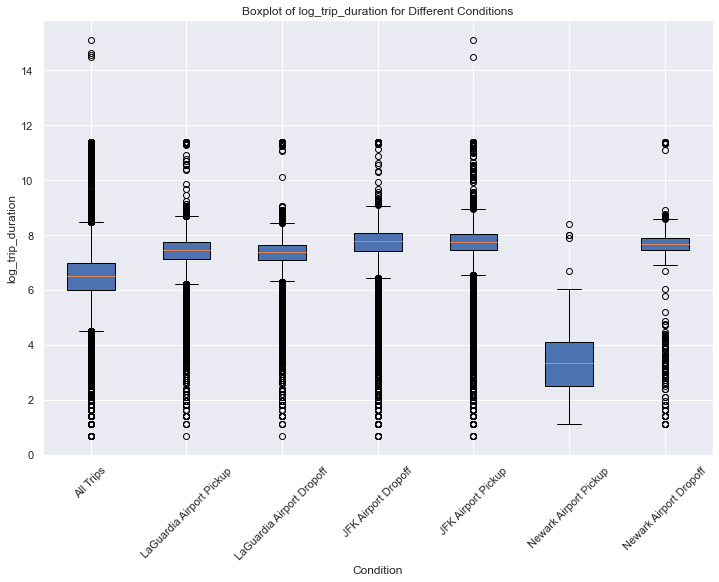

In [50]:
conditions = [
    ('All Trips', df['log_trip_duration']),
    ('LaGuardia Airport Pickup', df[df['LaGuardia_Airport_pickup'] == 1]['log_trip_duration']),
    ('LaGuardia Airport Dropoff', df[df['LaGuardia_Airport_dropoff'] == 1]['log_trip_duration']),
    ('JFK Airport Dropoff', df[df['JFK_Airport_dropoff'] == 1]['log_trip_duration']),
    ('JFK Airport Pickup', df[df['JFK_Airport_pickup'] == 1]['log_trip_duration']),
    ('Newark Airport Pickup', df[df['Newark_Airport_pickup'] == 1]['log_trip_duration']),
    ('Newark Airport Dropoff', df[df['Newark_Airport_dropoff'] == 1]['log_trip_duration'])
]

data_for_boxplot = [data for label, data in conditions]

plt.figure(figsize=(12, 8))
plt.boxplot(data_for_boxplot, labels=[label for label, data in conditions], patch_artist=True)

plt.xlabel('Condition')
plt.ylabel('log_trip_duration')
plt.title('Boxplot of log_trip_duration for Different Conditions')
plt.xticks(rotation=45)
plt.show()


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** C одной стороны, признаки не выглядят хорошими (кроме поездки из аэропорта Ньюарка, но это скорее всего обусловлено малым числом наблюдений). С другой, у всех признаков меньше разброс, чем в среднем по выборке (кроме "из Ньюарка"), также их значения в среднем выше (а учитывая, что это логарифм, так вообще замечательно) 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, procentile, long_num, lat_num):
        self.long_num = long_num + 1
        self.lat_num = lat_num + 1
        self.procentile = procentile
        pass

    def show_map(self, X):
        # Получаем границы прямоугольников
        latitude_intervals, longitude_intervals = self._fit(X)

        # Создаем карту
        _map = folium.Map(location=[sum(latitude_intervals) / len(latitude_intervals),
                                    sum(longitude_intervals) / len(longitude_intervals)],
                          zoom_start=11)

        # Рисуем прямоугольники
        for i in range(len(latitude_intervals) - 1):
            for j in range(len(longitude_intervals) - 1):
                lat1, lon1 = latitude_intervals[i], longitude_intervals[j]
                lat2, lon2 = latitude_intervals[i + 1], longitude_intervals[j + 1]

                # Добавляем прямоугольник
                folium.Rectangle(bounds=[(lat1, lon1), (lat2, lon2)],
                                color='red',
                                fill=False).add_to(_map)

                # Рассчитываем центр прямоугольника
                center_lat = (lat1 + lat2) / 2
                center_lon = (lon1 + lon2) / 2

                # Добавляем круг в центр прямоугольника
                folium.Circle(location=[center_lat, center_lon],
                              radius=150,
                              color='red',
                              fill=True,
                              fill_color='red').add_to(_map)

        return _map

    def _fit(self, X):

        longitude = np.hstack([X['pickup_longitude'].values, X['dropoff_longitude'].values])
        latitude = np.hstack([X['pickup_latitude'].values, X['dropoff_latitude'].values])

        longitude_all_interval = np.percentile(longitude, [self.procentile/2, 100 - self.procentile/2])
        latitude_all_interval = np.percentile(latitude, [self.procentile/2, 100 - self.procentile/2])

        self.latitude_intervals = np.linspace(latitude_all_interval[0], latitude_all_interval[1], self.lat_num)

        self.longitude_intervals = np.linspace(longitude_all_interval[0], longitude_all_interval[1], self.long_num)

        for i in range(len(self.latitude_intervals) - 1):
            for j in range(len(self.longitude_intervals) - 1):
                lat1, lon1 = self.latitude_intervals[i], self.longitude_intervals[j]
                lat2, lon2 = self.latitude_intervals[i+1], self.longitude_intervals[j+1]

        return self.latitude_intervals, self.longitude_intervals

    def _transform(self, X):
        # Получаем границы прямоугольников
        latitude_intervals, longitude_intervals = self._fit(X)

        # Инициализируем колонки "trip_start" и "trip_finish" с пустыми значениями (-1)
        X['trip_start'] = -1
        X['trip_finish'] = -1

        # Определяем прямоугольник для каждой поездки и обновляем соответствующие колонки
        for i in range(len(latitude_intervals) - 1):
            for j in range(len(longitude_intervals) - 1):
                lat1, lon1 = latitude_intervals[i], longitude_intervals[j]
                lat2, lon2 = latitude_intervals[i + 1], longitude_intervals[j + 1]

                # Определяем прямоугольник для pickup
                X.loc[(X['pickup_latitude'] >= lat1) & (X['pickup_latitude'] < lat2) &
                      (X['pickup_longitude'] >= lon1) & (X['pickup_longitude'] < lon2), 'trip_start'] = i * self.long_num + j

                # Определяем прямоугольник для dropoff
                X.loc[(X['dropoff_latitude'] >= lat1) & (X['dropoff_latitude'] < lat2) &
                      (X['dropoff_longitude'] >= lon1) & (X['dropoff_longitude'] < lon2), 'trip_finish'] = i * self.long_num + j

        return X        

In [52]:
b = MapGridTransformer(4, 4, 6)

df_full = df
df_full_trans = b._transform(df_full)

df_full_trans.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,during_traffic_jams,during_free_roads,LaGuardia_Airport_pickup,LaGuardia_Airport_dropoff,JFK_Airport_pickup,JFK_Airport_dropoff,Newark_Airport_pickup,Newark_Airport_dropoff,trip_start,trip_finish
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0,0,0,0,0,0,0,0,20,21
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,0,0,0,0,0,0,0,0,15,10
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,1,0,0,0,0,0,0,0,20,10
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,0,0,0,0,0,0,0,0,10,-1
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,0,0,0,0,0,0,0,0,25,25


In [53]:
b.show_map(df_full)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_log_error, r2_score

numeric_features = ['day_of_year', 'hour_of_day', 'log_haversine']
binary_features = ['anomal_day', 'during_traffic_jams', 'during_free_roads',
                   'LaGuardia_Airport_pickup', 'LaGuardia_Airport_dropoff',
                   'JFK_Airport_pickup', 'JFK_Airport_dropoff',
                   'Newark_Airport_pickup', 'Newark_Airport_dropoff']
categorical_features = ['day_of_week', 'month', 'trip_start', 'trip_finish']

numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(sparse=False)
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())])

X = df_full_trans[['day_of_year', 'hour_of_day', 'log_haversine'] + binary_features + categorical_features]
y = df_full_trans['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))

print('R^2:', r2)
print('RMSLE:', rmsle)

R^2: 0.6364639511446281
RMSLE: 0.4762102118848612


**Давайте посмотрим на интересную статистику для разбиения на разное кол-во прямоугольников:**

*b = MapGridTransformer(4, 4, 6)*

R^2: 0.64
RMSLE: 0.48


*b = MapGridTransformer(4, 10, 12):*

R^2: 0.65
RMSLE: 0.47


*b = MapGridTransformer(1, 10, 12):*

R^2: 0.65
RMSLE: 0.47


Вывод: от увеличения количества прямоугольников или увеличения площади, модель лучше не становится

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

unique_vendor_id = df_full_trans['vendor_id'].nunique()
unique_passenger_count = df_full_trans['passenger_count'].nunique()
unique_store_and_fwd_flag = df_full_trans['store_and_fwd_flag'].nunique()

print('Уникальные значения для признака vendor_id:', unique_vendor_id)
print('Уникальные значения для признака passenger_count:', unique_passenger_count)
print('Уникальные значения для признака store_and_fwd_flag:', unique_store_and_fwd_flag)


Уникальные значения для признака vendor_id: 2
Уникальные значения для признака passenger_count: 10
Уникальные значения для признака store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

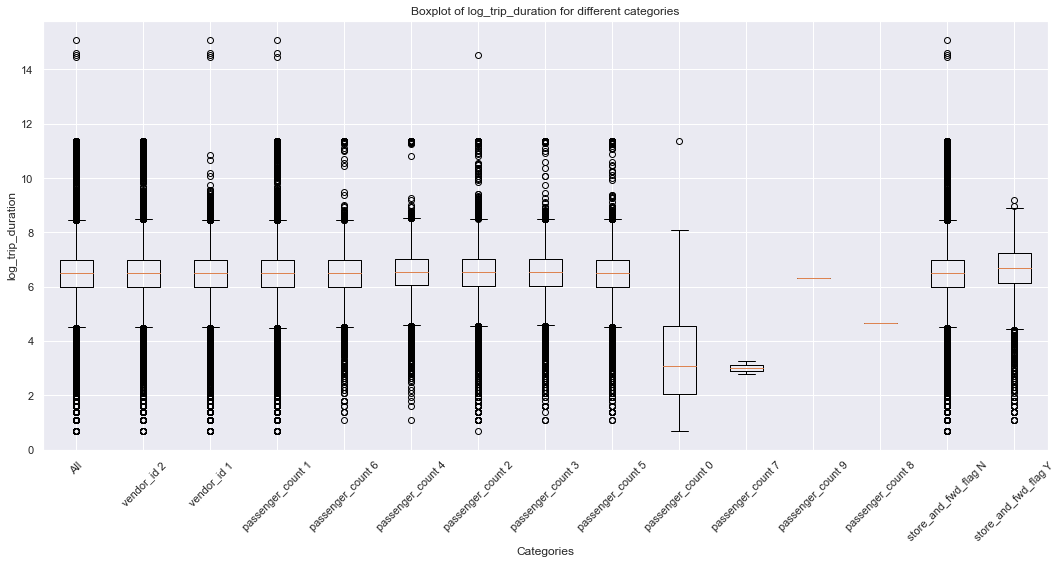

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import matplotlib.pyplot as plt

unique_vendor_ids = df_full_trans['vendor_id'].unique()
data_vendor_id = []

for vendor_id in unique_vendor_ids:
    data_vendor_id.append(df_full_trans[df_full_trans['vendor_id'] == vendor_id]['log_trip_duration'])

unique_passenger_counts = df_full_trans['passenger_count'].unique()

data_passenger_count = []

for passenger_count in unique_passenger_counts:
    data_passenger_count.append(df_full_trans[df_full_trans['passenger_count'] == passenger_count]['log_trip_duration'])

unique_store_and_fwd_flags = df_full_trans['store_and_fwd_flag'].unique()

data_store_and_fwd_flag = []

for flag in unique_store_and_fwd_flags:
    data_store_and_fwd_flag.append(df_full_trans[df_full_trans['store_and_fwd_flag'] == flag]['log_trip_duration'])

data_all = [df_full_trans['log_trip_duration']] + data_vendor_id + data_passenger_count + data_store_and_fwd_flag
labels = ['All'] + [f'vendor_id {id}' for id in unique_vendor_ids] + \
         [f'passenger_count {count}' for count in unique_passenger_counts] + \
         [f'store_and_fwd_flag {flag}' for flag in unique_store_and_fwd_flags]

plt.figure(figsize=(15, 8))
plt.boxplot(data_all, labels=labels)
plt.xlabel('Categories')
plt.ylabel('log_trip_duration')
plt.title('Boxplot of log_trip_duration for different categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_full_trans_2 = pd.get_dummies(df_full_trans, columns=['vendor_id', 'store_and_fwd_flag'], drop_first=True)

feature_list = df_full_trans_2.columns.tolist()

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Не будут. Выбивающиеся,выбиваются только из-за малой выборке

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [58]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_log_error, r2_score

numeric_features = ['day_of_year', 'hour_of_day', 'log_haversine']
binary_features = ['anomal_day', 'during_traffic_jams', 'during_free_roads',
                   'LaGuardia_Airport_pickup', 'LaGuardia_Airport_dropoff',
                   'JFK_Airport_pickup', 'JFK_Airport_dropoff',
                   'Newark_Airport_pickup', 'Newark_Airport_dropoff', 'vendor_id_2', 'store_and_fwd_flag_Y']
categorical_features = ['day_of_week', 'month', 'trip_start', 'trip_finish', 'passenger_count']

numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(sparse=False)
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())])

X = df_full_trans_2[['day_of_year', 'hour_of_day', 'log_haversine'] + binary_features + categorical_features]
y = df_full_trans_2['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))

print('R^2:', r2)
print('RMSLE:', rmsle)


R^2: 0.6375544040613541
RMSLE: 0.47635557944667245


**Ответ**: Признаки и впрямь оказались бесполезными

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [59]:
features_to_drop = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

df_full_trans.drop(features_to_drop, axis=1, inplace=True)
feature_list = df_full_trans.columns.tolist()

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

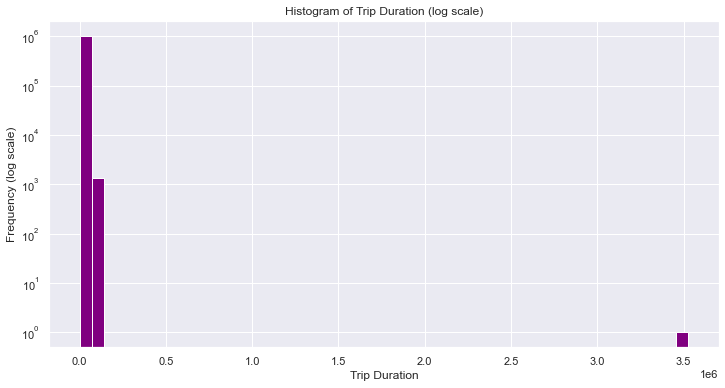

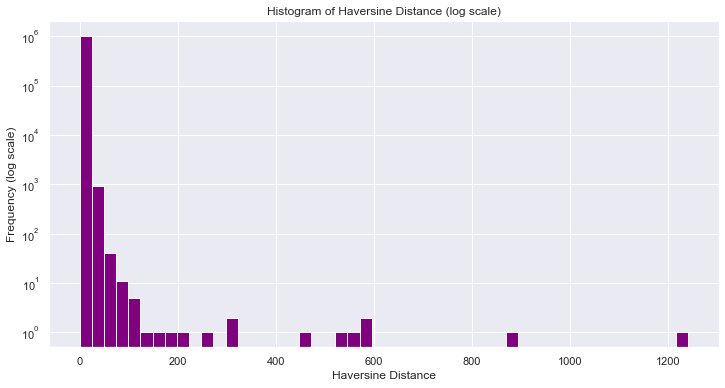

In [60]:
numeric_features = ['day_of_year', 'hour_of_day', 'log_haversine']
scaler = StandardScaler()
df_full_trans[numeric_features] = scaler.fit_transform(df_full_trans[numeric_features])


train_df, test_df = train_test_split(df_full_trans, test_size=0.3, random_state = 24)

plt.figure(figsize=(12, 6))
plt.hist(train_df['trip_duration'], bins=50, color = 'purple')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency (log scale)')
plt.yscale('log') 
plt.title('Histogram of Trip Duration (log scale)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(train_df['haversine'], bins=50, color = 'purple')
plt.xlabel('Haversine Distance')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.title('Histogram of Haversine Distance (log scale)')
plt.grid(True)
plt.show()


Примем волевое решение:


1) поездки не длятся меньше 60 секунд

2) поездки не длятся больше 2х часов

3) поездки не бывают больше чем на 50км

(я пробовал смотреть на поездки больше 50км, но там очень мало наблюдений)

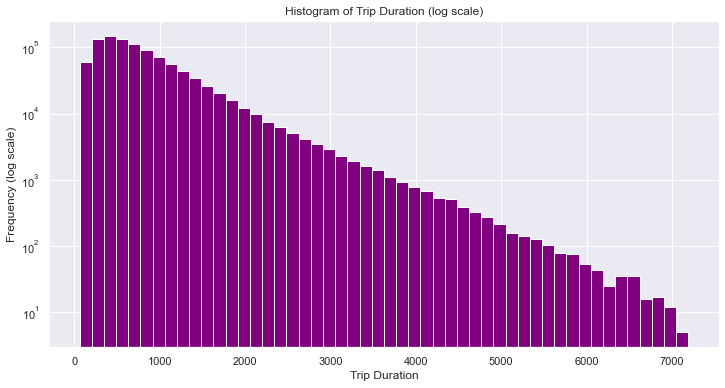

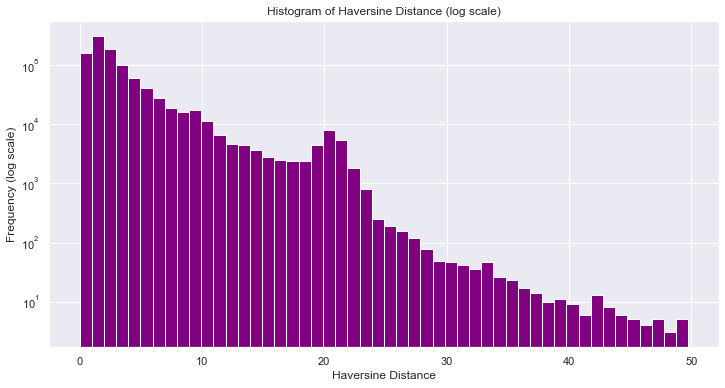

In [61]:
train_df = train_df[(train_df['trip_duration'] >= 60) & (train_df['trip_duration'] <= 7200) & (train_df['haversine'] <= 50)]

plt.figure(figsize=(12, 6))
plt.hist(train_df['trip_duration'], bins=50, color = 'purple')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')  
plt.title('Histogram of Trip Duration (log scale)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(train_df['haversine'], bins=50, color = 'purple')
plt.xlabel('Haversine Distance')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.title('Histogram of Haversine Distance (log scale)')
plt.grid(True)
plt.show()

Так намного лучше!

!!! это логарифмическая шкала по количеству. Иначе плохо понятно)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 


Примем, что признаки редкие, если встречаются менее чем в 0.5% случаев

In [62]:
categorical_to_combine = ['day_of_week', 'month', 'trip_start', 'trip_finish']

def handle_rare_categories(train_df, test_df, rare_threshold):
    train_df_processed = train_df.copy()
    test_df_processed = test_df.copy()
    
    categorical_features = ['day_of_week', 'month', 'trip_start', 'trip_finish']
    for feature in categorical_features:
        value_counts_train = train_df_processed[feature].value_counts(normalize=True)
        
        rare_categories_train = value_counts_train[value_counts_train < rare_threshold].index
        
        train_df_processed.loc[train_df_processed[feature].isin(rare_categories_train), feature] = 'other'
        test_df_processed.loc[test_df_processed[feature].isin(rare_categories_train), feature] = 'other'
    
    return train_df_processed, test_df_processed

train_df_processed, test_df_processed = handle_rare_categories(train_df, test_df, rare_threshold=0.05)


In [63]:
categorical_features = ['day_of_week', 'month', 'trip_start', 'trip_finish']

columns_to_drop = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude', 'trip_duration']


train_df_processed.drop(columns=columns_to_drop, inplace=True)
test_df_processed.drop(columns=columns_to_drop, inplace=True)

train_df_HR = pd.get_dummies(train_df_processed, columns=categorical_features, drop_first=True)
test_df_HR = pd.get_dummies(test_df_processed, columns=categorical_features, drop_first=True)


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [64]:
X_train = train_df_HR.drop('log_trip_duration', axis=1)
y_train = train_df_HR['log_trip_duration']
X_test = test_df_HR.drop('log_trip_duration', axis=1)
y_test = test_df_HR['log_trip_duration']

ridge_model = Ridge() 
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))

print('R^2:', r2)
print('RMSLE:', rmsle)


R^2: 0.6425849115963289
RMSLE: 0.47413731668011905


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

Уже сделал выше Пу пу пу, этот код удален:
было их 51, а стало 37

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [65]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

lasso_model = Lasso() 
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))

print('R^2:', r2)
print('RMSLE:', rmsle)

R^2: 0.27496104710121616
RMSLE: 0.6760084985259383


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [354]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=24)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_cv.fit(X_val_split, y_val_split)
best_lasso = Lasso(alpha=lasso_cv.alpha_)

ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_cv.fit(X_val_split, y_val_split)
best_ridge = Ridge(alpha=ridge_cv.alpha_)

best_lasso.fit(X_train, y_train)
best_ridge.fit(X_train, y_train)

lasso_pred = best_lasso.predict(X_test)
ridge_pred = best_ridge.predict(X_test)

rmsle_lasso = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(lasso_pred)))
rmsle_ridge = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(ridge_pred)))

print("RMSLE for Lasso on test set:", rmsle_lasso)
print("RMSLE for Ridge on test set:", rmsle_ridge)


RMSLE for Lasso on test set: 0.47426554406989374
RMSLE for Ridge on test set: 0.47417103535458865


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

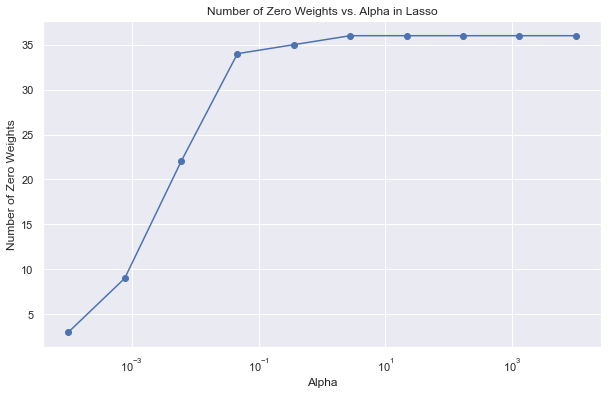

In [356]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
zero_weights_count = []

alphas = np.logspace(-4, 4, 10)

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    zero_weights_count.append(np.sum(lasso_model.coef_ == 0))

plt.figure(figsize=(10, 6))
plt.plot(alphas, zero_weights_count, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Zero Weights')
plt.title('Number of Zero Weights vs. Alpha in Lasso')
plt.grid(True)
plt.show()

**Ответ**

Нам придется иметь \alpha примерно 0.005, в случае потери половины признаков

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Пу-пу-пуууу, это что, нас ждет четвертый ванхотрекордер? Да-да

Но перед этим где-то наверху отыщем версию таблицу, над которой мы еще не издевались)


In [367]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df_15, test_df_15 = train_test_split(df_full_trans, test_size=0.3, random_state = 24)
train_df_15 = train_df_15[(train_df_15['trip_duration'] >= 60) & (train_df_15['trip_duration'] <= 7200) & (train_df_15['haversine'] <= 50)]


def add_popular_trip_feature(train_df, test_df):
    popular_trip_pairs = train_df.groupby(['trip_start', 'trip_finish']).size().nlargest(100).index.tolist()
    popular_trip_set = set(popular_trip_pairs)
    train_df['popular_trip'] = train_df.apply(lambda row: popular_trip_pairs.index((row['trip_start'], row['trip_finish'])) if (row['trip_start'], row['trip_finish']) in popular_trip_set else -1, axis=1)
    test_df['popular_trip'] = test_df.apply(lambda row: popular_trip_pairs.index((row['trip_start'], row['trip_finish'])) if (row['trip_start'], row['trip_finish']) in popular_trip_set else -1, axis=1)
    
    return train_df, test_df

train_df_15_processed, test_df_15_processed = add_popular_trip_feature(train_df_15, test_df_15)



C:\Users\vovac\AppData\Local\Temp/ipykernel_50956/1166972020.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['popular_trip'] = test_df.apply(lambda row: popular_trip_pairs.index((row['trip_start'], row['trip_finish'])) if (row['trip_start'], row['trip_finish']) in popular_trip_set else -1, axis=1)


In [368]:
categorical_features_15 = ['day_of_week', 'month', 'trip_start', 'trip_finish', 'popular_trip']

columns_to_drop = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

train_df_15_processed.drop(columns=columns_to_drop, inplace=True)
test_df_15_processed.drop(columns=columns_to_drop, inplace=True)

train_df_15_HR = pd.get_dummies(train_df_15_processed, columns=categorical_features_15, drop_first=True)
test_df_15_HR = pd.get_dummies(test_df_15_processed, columns=categorical_features_15, drop_first=True)

C:\Users\vovac\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [370]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train = train_df_15_HR.drop('log_trip_duration', axis=1)
y_train = train_df_15_HR['log_trip_duration']
X_test = test_df_15_HR.drop('log_trip_duration', axis=1)
y_test = test_df_15_HR['log_trip_duration']

ridge_model = Ridge() 
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))

print('R^2:', r2)
print('RMSLE:', rmsle)

R^2: 0.6532201076225235
RMSLE: 0.4669534884209213


Стало лучше. Не сильно, но лучше).

Хмммм, давайте еще поподгоняем альфу:



In [372]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=24)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 10), cv=15)
lasso_cv.fit(X_val_split, y_val_split)
best_lasso = Lasso(alpha=lasso_cv.alpha_)

ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=15)
ridge_cv.fit(X_val_split, y_val_split)
best_ridge = Ridge(alpha=ridge_cv.alpha_)

best_lasso.fit(X_train, y_train)
best_ridge.fit(X_train, y_train)

lasso_pred = best_lasso.predict(X_test)
ridge_pred = best_ridge.predict(X_test)

rmsle_lasso = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(lasso_pred)))
rmsle_ridge = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(ridge_pred)))

print("RMSLE for Lasso on test set:", rmsle_lasso)
print("RMSLE for Ridge on test set:", rmsle_ridge)


RMSLE for Lasso on test set: 0.4676174984153531
RMSLE for Ridge on test set: 0.4669518103582272


Лучше все равно не стало. А это значит одно из двух: либо модель очень хороша, либо очень плоха. С

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.